## Customer Analysis

分析目標:分析客戶各項資訊與消費額的關係，並利用迴歸模型預估客戶的可能消費額。

##### Attribute Information

People<br>
ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year<br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>
<br>
Products<br>
MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>
<br>
Promotion<br>
NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
<br>
Place<br>
NumWebPurchases: Number of purchases made through the company’s website<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s website in the last month<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
raw_data  = pd.read_csv('marketing_campaign.csv',delimiter = '\t')

In [3]:
df = raw_data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isna().sum()[df.isna().sum()>0]

Income    24
dtype: int64

In [6]:
df = df.dropna(axis=0)

In [7]:
df = df.drop(['ID','Recency','Z_CostContact','Z_Revenue'], axis = 1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


##### Age

In [8]:
pd.to_datetime(df['Dt_Customer']).max()

Timestamp('2014-12-06 00:00:00')

In [9]:
df['Age'] = 2015 - df['Year_Birth']
df = df.drop(['Year_Birth'], axis = 1)

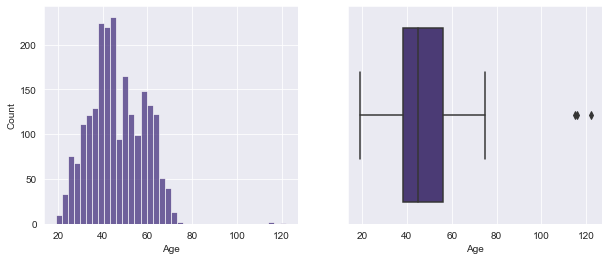

In [10]:
sns.set_style('darkgrid')
sns.set_palette('viridis')
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(x = df['Age'])
plt.subplot(1,2,2)
sns.boxplot(x = df['Age'])
plt.show()

In [11]:
df.drop('Dt_Customer', axis = 1, inplace = True)

##### Education

In [12]:
np.unique(df['Education'])

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [13]:
df['Education'] = df['Education'].replace(['2n Cycle', 'Master', 'PhD'], 'High')
df['Education'] = df['Education'].replace(['Graduation'], 'Basic')

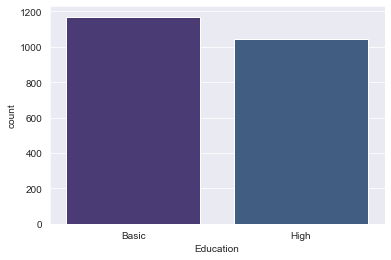

In [14]:
sns.countplot(x = df['Education'])
plt.show()

##### Marital_Status

In [15]:
np.unique(df['Marital_Status'])

array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)

In [16]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd','Alone','Divorced','Widow','YOLO'], 'Single')

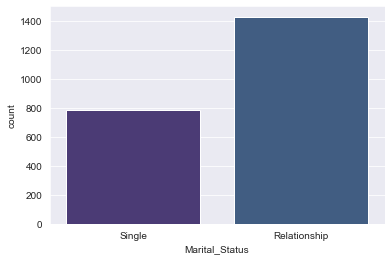

In [17]:
sns.countplot(x = df['Marital_Status'])
plt.show()

##### Income

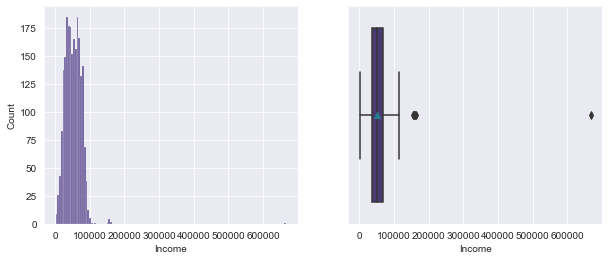

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(x = df['Income'])
plt.subplot(1,2,2)
sns.boxplot(x = df['Income'], showmeans = True)
plt.show()

##### Kid & Teen

In [19]:
df['Child'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Kidhome','Teenhome'], axis = 1)

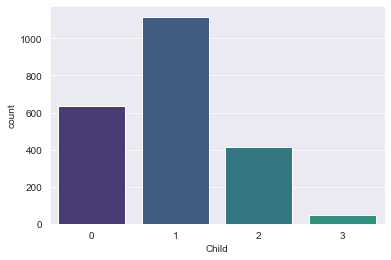

In [20]:
sns.countplot(x = df['Child'])
plt.show()

##### Spend

In [21]:
df['TotalSpend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

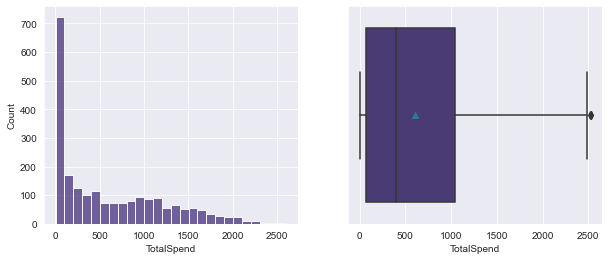

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(x = df['TotalSpend'], binwidth = 100)
plt.subplot(1,2,2)
sns.boxplot(x = df['TotalSpend'], showmeans = True)
plt.show()

##### NumDealsPurchases

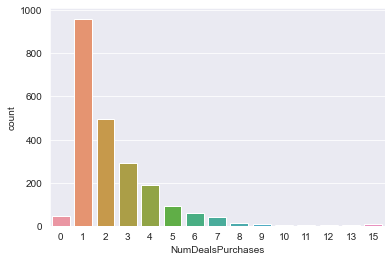

In [23]:
sns.countplot(x = df['NumDealsPurchases'])
plt.show()

##### Purchase Place

In [24]:
print('Purchase Place \n')
print('Web :',str(df['NumWebPurchases'].sum()))
print('Catalogue :',str(df['NumCatalogPurchases'].sum()))
print('Store :',str(df['NumStorePurchases'].sum()))

Purchase Place 

Web : 9053
Catalogue : 5919
Store : 12855


##### NumWebVisitsMonth

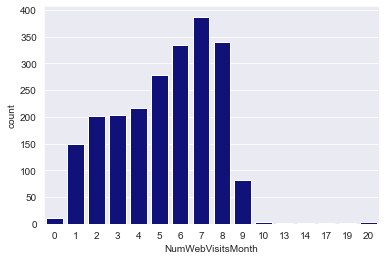

Average : 5.0


In [25]:
sns.countplot(x = df['NumWebVisitsMonth'], color='darkblue')
plt.show()

print('Average :',str(df['NumWebVisitsMonth'].mean().round()))

##### AcceptedCmp & Response

In [26]:
print('Number of customer accepted the offer in the 1st campaign :'\
      , str(df['AcceptedCmp1'].sum()) ,'('+ str(((df['AcceptedCmp1'].sum() /df.shape[0])*100).round(1))+'%' +')')
print('Number of customer accepted the offer in the 2st campaign :'\
      , str(df['AcceptedCmp2'].sum()) ,'('+ str(((df['AcceptedCmp2'].sum() /df.shape[0])*100).round(1))+'%' +')')
print('Number of customer accepted the offer in the 3st campaign :'\
      , str(df['AcceptedCmp3'].sum()) ,'('+ str(((df['AcceptedCmp3'].sum() /df.shape[0])*100).round(1))+'%' +')')
print('Number of customer accepted the offer in the 4st campaign :'\
      , str(df['AcceptedCmp4'].sum()) ,'('+ str(((df['AcceptedCmp4'].sum() /df.shape[0])*100).round(1))+'%' +')')
print('Number of customer accepted the offer in the 5st campaign :'\
      , str(df['AcceptedCmp5'].sum()) ,'('+ str(((df['AcceptedCmp5'].sum() /df.shape[0])*100).round(1))+'%' +')')
print('Number of customer accepted the offer in the last campaign :'\
      , str(df['Response'].sum()) ,'('+ str(((df['Response'].sum() /df.shape[0])*100).round(1))+'%' +')')

Number of customer accepted the offer in the 1st campaign : 142 (6.4%)
Number of customer accepted the offer in the 2st campaign : 30 (1.4%)
Number of customer accepted the offer in the 3st campaign : 163 (7.4%)
Number of customer accepted the offer in the 4st campaign : 164 (7.4%)
Number of customer accepted the offer in the 5st campaign : 162 (7.3%)
Number of customer accepted the offer in the last campaign : 333 (15.0%)


##### Complain

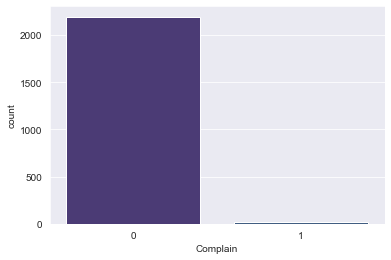

0    2195
1      21
Name: Complain, dtype: int64


In [27]:
sns.countplot(x = df['Complain'])
plt.show()
print(df['Complain'].value_counts())

##### Remove Outliers

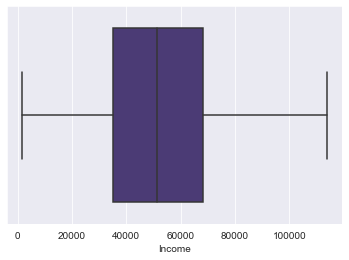

In [28]:
n = 1.5
IQR = np.percentile(df['Income'],75) - np.percentile(df['Income'],25)
income_2 = df[(df['Income']<np.percentile(df['Income'],75)+n*IQR)&(df['Income']>np.percentile(df['Income'],25)-n*IQR)]

sns.boxplot(x = income_2['Income'])
plt.show()

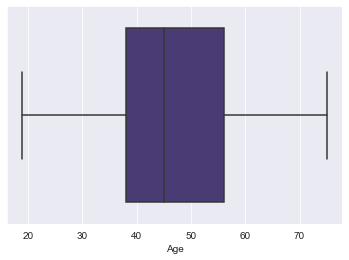

In [29]:
n = 1.5
IQR = np.percentile(income_2['Age'],75) - np.percentile(income_2['Age'],25)
age_2 = income_2[(income_2['Age']<np.percentile(income_2['Age'],75)+n*IQR)&(income_2['Age']>np.percentile(income_2['Age'],25)-n*IQR)]

sns.boxplot(x = age_2['Age'])
plt.show()

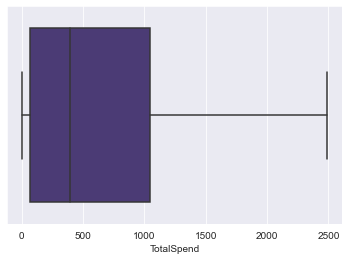

In [30]:
n = 1.5
IQR = np.percentile(age_2['TotalSpend'],75) - np.percentile(age_2['TotalSpend'],25)
spend_2 = age_2[(age_2['TotalSpend']<np.percentile(age_2['TotalSpend'],75)+n*IQR)&(age_2['TotalSpend']>np.percentile(age_2['TotalSpend'],25)-n*IQR)]

sns.boxplot(x = spend_2['TotalSpend'])
plt.show()

In [31]:
df1 = spend_2

##### Analysis

In [32]:
df1

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Child,TotalSpend
0,Basic,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,0,1617
1,Basic,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,2,27
2,Basic,Relationship,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,0,776
3,Basic,Relationship,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,31,1,53
4,High,Relationship,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,34,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Basic,Relationship,61223.0,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,48,1,1341
2236,High,Relationship,64014.0,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,69,3,444
2237,Basic,Single,56981.0,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,34,0,1241
2238,High,Relationship,69245.0,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,59,1,843


In [33]:
df1 = df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain'],axis=1)

In [34]:
df1 = df1.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat',
                          'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Gold',
                          'NumDealsPurchases':'Discount', 'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog',
                          'NumStorePurchases':'Store', 'NumWebVisitsMonth':'Visits'})

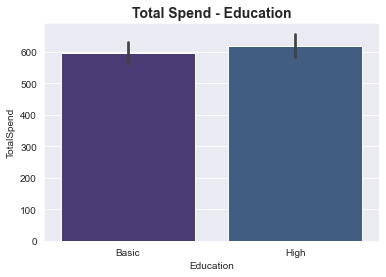

In [35]:
sns.barplot(x = df1['Education'], y = df1['TotalSpend'])
plt.title('Total Spend - Education', fontsize = 14, weight = 'bold')
plt.show()

教育程度方面，Basic(學士、學士以下)與High(碩士、博士)對於總消費沒有顯著影響，兩者平均花費約為600單位。

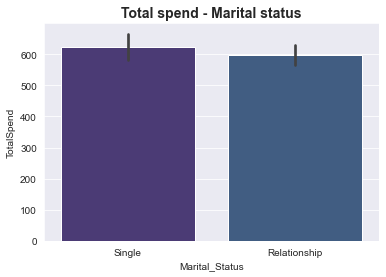

In [36]:
sns.barplot(x = df1['Marital_Status'], y = df1['TotalSpend'])
plt.title('Total spend - Marital status', fontsize = 14, weight = 'bold')
plt.show()

單身與非單身對於總消費無顯著影響，兩者皆約為600單位。

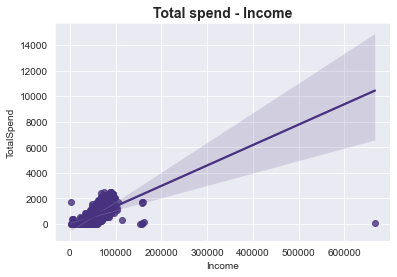

In [37]:
sns.regplot(x = df1['Income'], y = df1['TotalSpend'])
plt.title('Total spend - Income', fontsize = 14, weight = 'bold' )
plt.show()

收入與總消費呈正向關係。

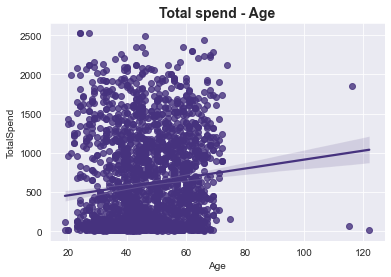

In [38]:
sns.regplot(x = df1['Age'], y = df1['TotalSpend'])
plt.title('Total spend - Age', fontsize = 14, weight = 'bold')
plt.show()

消費者年齡與總消費呈正向關係。

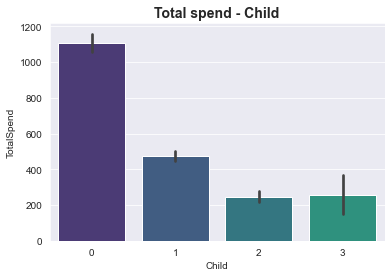

In [39]:
sns.barplot(x = df1['Child'], y = df1['TotalSpend'])
plt.title('Total spend - Child', fontsize = 14, weight = 'bold')
plt.show()

消費者子女數與總消費呈負相關，無子女消費者的消費額大幅高於有子女的消費者。

Relationship between [Wines] and [Education, Marital Status, Child, Age]


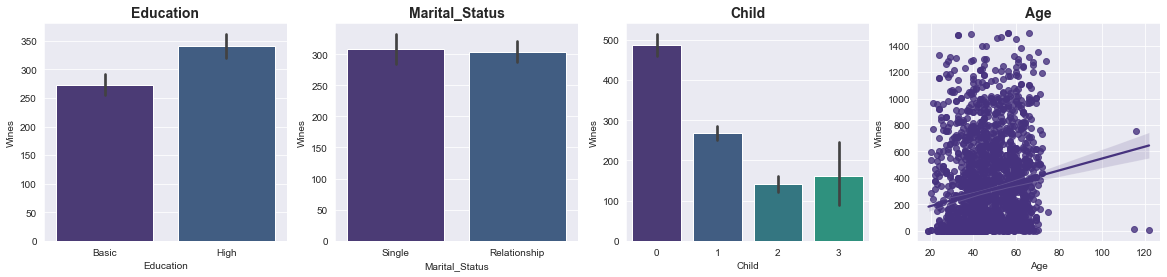

In [40]:
print('Relationship between [Wines] and [Education, Marital Status, Child, Age]')

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(x = df1['Education'], y = df1['Wines'])
plt.title('Education', fontsize = 14, weight = 'bold')
plt.subplot(1,4,2)
sns.barplot(x = df1['Marital_Status'], y = df1['Wines'])
plt.title('Marital_Status', fontsize = 14, weight = 'bold')
plt.subplot(1,4,3)
sns.barplot(x = df1['Child'], y = df1['Wines'])
plt.title('Child', fontsize = 14, weight = 'bold')
plt.subplot(1,4,4)
sns.regplot(x = df1['Age'], y = df1['Wines'])
plt.title('Age', fontsize = 14, weight = 'bold')

plt.show()

Relationship between [Fruits] and [Education, Marital Status, Child, Age]


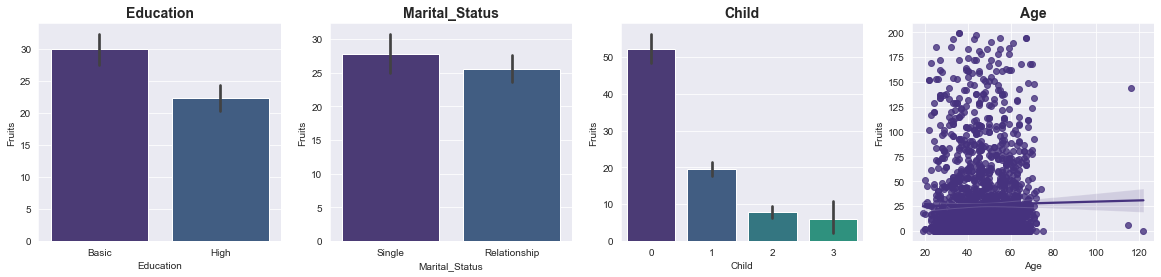

In [41]:
print('Relationship between [Fruits] and [Education, Marital Status, Child, Age]')

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(x = df1['Education'], y = df1['Fruits'])
plt.title('Education', fontsize = 14, weight = 'bold')
plt.subplot(1,4,2)
sns.barplot(x = df1['Marital_Status'], y = df1['Fruits'])
plt.title('Marital_Status', fontsize = 14, weight = 'bold')
plt.subplot(1,4,3)
sns.barplot(x = df1['Child'], y = df1['Fruits'])
plt.title('Child', fontsize = 14, weight = 'bold')
plt.subplot(1,4,4)
sns.regplot(x = df1['Age'], y = df1['Fruits'])
plt.title('Age', fontsize = 14, weight = 'bold')

plt.show()

Relationship between [Meat] and [Education, Marital Status, Child, Age]


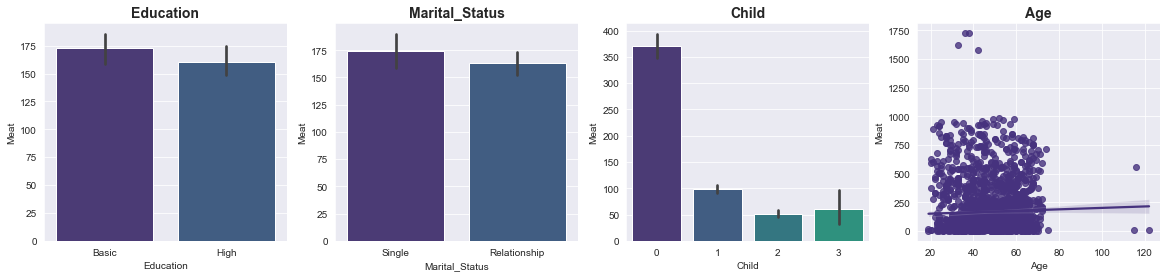

In [42]:
print('Relationship between [Meat] and [Education, Marital Status, Child, Age]')

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(x = df1['Education'], y = df1['Meat'])
plt.title('Education', fontsize = 14, weight = 'bold')
plt.subplot(1,4,2)
sns.barplot(x = df1['Marital_Status'], y = df1['Meat'])
plt.title('Marital_Status', fontsize = 14, weight = 'bold')
plt.subplot(1,4,3)
sns.barplot(x = df1['Child'], y = df1['Meat'])
plt.title('Child', fontsize = 14, weight = 'bold')
plt.subplot(1,4,4)
sns.regplot(x = df1['Age'], y = df1['Meat'])
plt.title('Age', fontsize = 14, weight = 'bold')

plt.show()

Relationship between [Fish] and [Education, Marital Status, Child, Age]


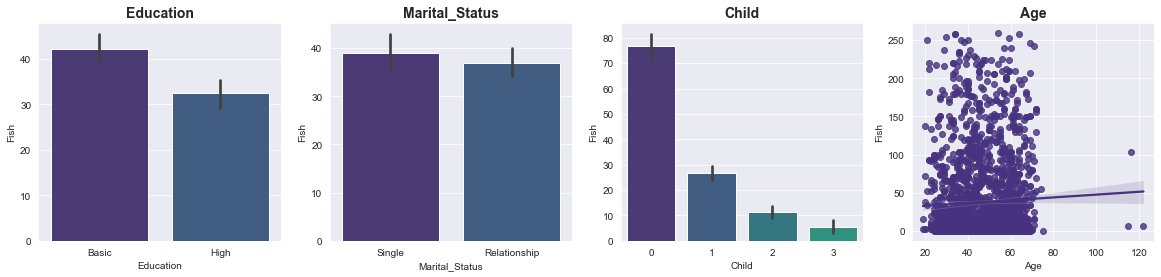

In [43]:
print('Relationship between [Fish] and [Education, Marital Status, Child, Age]')

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(x = df1['Education'], y = df1['Fish'])
plt.title('Education', fontsize = 14, weight = 'bold')
plt.subplot(1,4,2)
sns.barplot(x = df1['Marital_Status'], y = df1['Fish'])
plt.title('Marital_Status', fontsize = 14, weight = 'bold')
plt.subplot(1,4,3)
sns.barplot(x = df1['Child'], y = df1['Fish'])
plt.title('Child', fontsize = 14, weight = 'bold')
plt.subplot(1,4,4)
sns.regplot(x = df1['Age'], y = df1['Fish'])
plt.title('Age', fontsize = 14, weight = 'bold')

plt.show()

Relationship between [Sweets] and [Education, Marital Status, Child, Age]


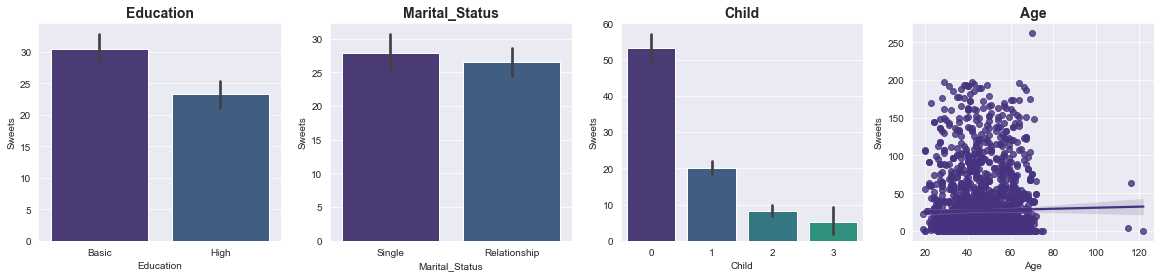

In [44]:
print('Relationship between [Sweets] and [Education, Marital Status, Child, Age]')

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(x = df1['Education'], y = df1['Sweets'])
plt.title('Education', fontsize = 14, weight = 'bold')
plt.subplot(1,4,2)
sns.barplot(x = df1['Marital_Status'], y = df1['Sweets'])
plt.title('Marital_Status', fontsize = 14, weight = 'bold')
plt.subplot(1,4,3)
sns.barplot(x = df1['Child'], y = df1['Sweets'])
plt.title('Child', fontsize = 14, weight = 'bold')
plt.subplot(1,4,4)
sns.regplot(x = df1['Age'], y = df1['Sweets'])
plt.title('Age', fontsize = 14, weight = 'bold')

plt.show()

Relationship between [Gold] and [Education, Marital Status, Child, Age]


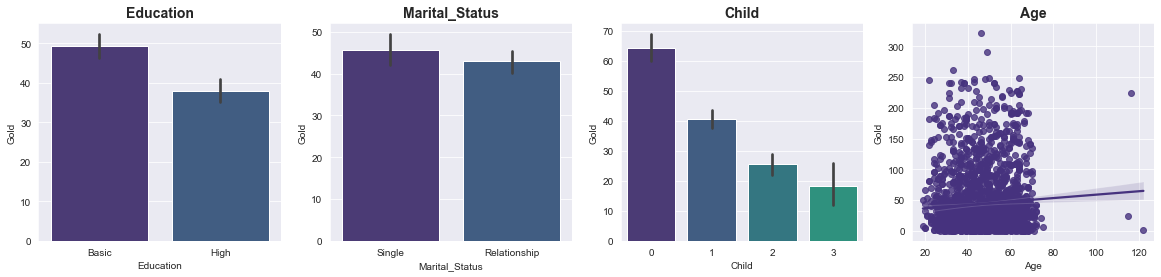

In [45]:
print('Relationship between [Gold] and [Education, Marital Status, Child, Age]')

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(x = df1['Education'], y = df1['Gold'])
plt.title('Education', fontsize = 14, weight = 'bold')
plt.subplot(1,4,2)
sns.barplot(x = df1['Marital_Status'], y = df1['Gold'])
plt.title('Marital_Status', fontsize = 14, weight = 'bold')
plt.subplot(1,4,3)
sns.barplot(x = df1['Child'], y = df1['Gold'])
plt.title('Child', fontsize = 14, weight = 'bold')
plt.subplot(1,4,4)
sns.regplot(x = df1['Age'], y = df1['Gold'])
plt.title('Age', fontsize = 14, weight = 'bold')

plt.show()

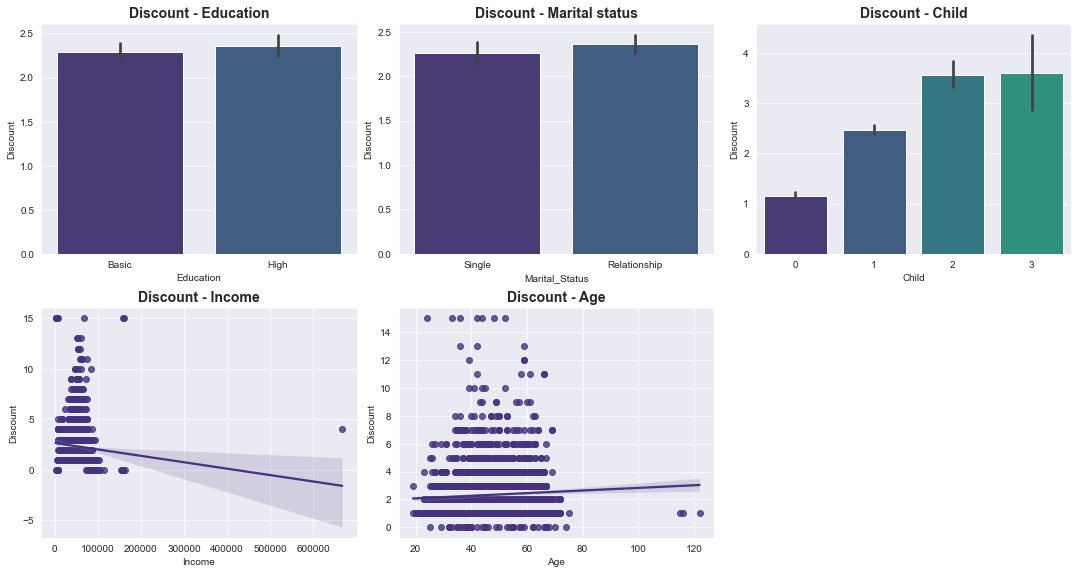

In [46]:
plt.figure(figsize = (15,8))

plt.subplot(2,3,1)
sns.barplot(x = df1['Education'], y = df1['Discount'])
plt.title('Discount - Education',fontsize = 14, weight = 'bold')

plt.subplot(2,3,2)
sns.barplot(x = df1['Marital_Status'], y = df1['Discount'])
plt.title('Discount - Marital status',fontsize = 14, weight = 'bold')

plt.subplot(2,3,3)
sns.barplot(x = df1['Child'], y = df1['Discount'])
plt.title('Discount - Child',fontsize = 14, weight = 'bold')

plt.subplot(2,3,4)
sns.regplot(x = df1['Income'], y = df1['Discount'])
plt.title('Discount - Income',fontsize = 14, weight = 'bold')

plt.subplot(2,3,5)
sns.regplot(x = df1['Age'], y = df1['Discount'])
plt.title('Discount - Age',fontsize = 14, weight = 'bold')

plt.tight_layout(pad = 0.8)

plt.show()

教育程度、婚姻狀況以及年齡對於折扣的使用頻率無顯著影響；而子女數與折扣使用頻率呈正相關，即子女數愈多的消費者愈偏好使用折扣來消費；收入方面，消費者的收入愈高使用折扣的頻率愈低；年齡對於折扣使用頻率的影響程度不大。

##### Modeling

In [47]:
df2 = df1.copy()
df2

,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Discount,Web,Catalog,Store,Visits,Age,Child,TotalSpend
0,Basic,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,58,0,1617
1,Basic,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,61,2,27
2,Basic,Relationship,71613.0,426,49,127,111,21,42,1,8,2,10,4,50,0,776
3,Basic,Relationship,26646.0,11,4,20,10,3,5,2,2,0,4,6,31,1,53
4,High,Relationship,58293.0,173,43,118,46,27,15,5,5,3,6,5,34,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Basic,Relationship,61223.0,709,43,182,42,118,247,2,9,3,4,5,48,1,1341
2236,High,Relationship,64014.0,406,0,30,0,0,8,7,8,2,5,7,69,3,444
2237,Basic,Single,56981.0,908,48,217,32,12,24,1,2,3,13,6,34,0,1241
2238,High,Relationship,69245.0,428,30,214,80,30,61,2,6,5,10,3,59,1,843


In [48]:
df2.drop(['Wines','Fruits','Meat','Fish','Sweets','Gold'],axis = 1, inplace = True)
df2

,Education,Marital_Status,Income,Discount,Web,Catalog,Store,Visits,Age,Child,TotalSpend
0,Basic,Single,58138.0,3,8,10,4,7,58,0,1617
1,Basic,Single,46344.0,2,1,1,2,5,61,2,27
2,Basic,Relationship,71613.0,1,8,2,10,4,50,0,776
3,Basic,Relationship,26646.0,2,2,0,4,6,31,1,53
4,High,Relationship,58293.0,5,5,3,6,5,34,1,422
...,...,...,...,...,...,...,...,...,...,...,...
2235,Basic,Relationship,61223.0,2,9,3,4,5,48,1,1341
2236,High,Relationship,64014.0,7,8,2,5,7,69,3,444
2237,Basic,Single,56981.0,1,2,3,13,6,34,0,1241
2238,High,Relationship,69245.0,2,6,5,10,3,59,1,843


In [49]:
df2['Education'] = pd.get_dummies(df2['Education'])['High']

In [50]:
df2['Marital_Status'] = pd.get_dummies(df2['Marital_Status'])['Relationship']

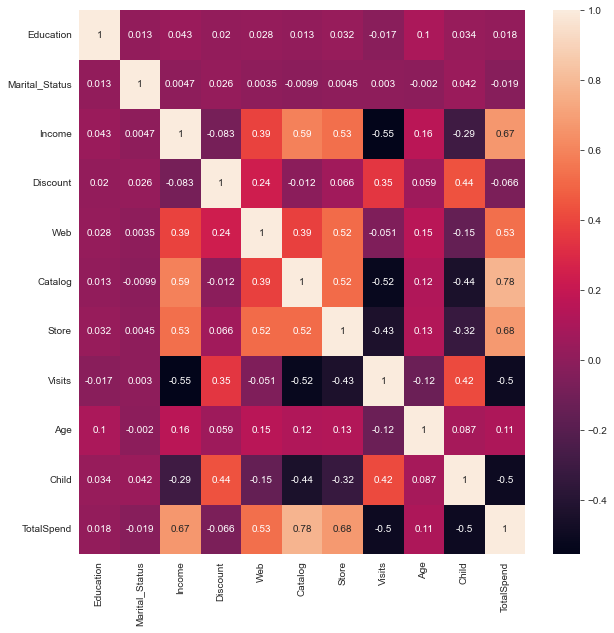

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn import metrics

In [53]:
y = df2['TotalSpend']
X = df2.drop('TotalSpend', axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Linear Regression

In [55]:
reg = LinearRegression()

In [56]:
def reg_model(X_train, X_test, y_train, y_test):
    reg.fit(X_train, y_train)
    X2 = add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    y_pred = reg.predict(X_test)
    print('[Linear Regression]','\n\n')
    
    print(est2.summary())
    print('-'*80)
    
    print('MAE', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-'*80)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(y_test - y_pred)
    plt.xlabel('Test - Prediction', fontsize = 13)
    
    plt.subplot(1,2,2)
    sns.regplot(x = y_test, y = y_pred)
    plt.xlabel('Test', fontsize = 13)
    plt.ylabel('Pridiction', fontsize = 13)
    
    plt.tight_layout(pad = 2)
    
    plt.show()

[Linear Regression] 


                            OLS Regression Results                            
Dep. Variable:             TotalSpend   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     609.1
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:18:15   Log-Likelihood:                -12505.
No. Observations:                1772   AIC:                         2.503e+04
Df Residuals:                    1761   BIC:                         2.509e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -97.

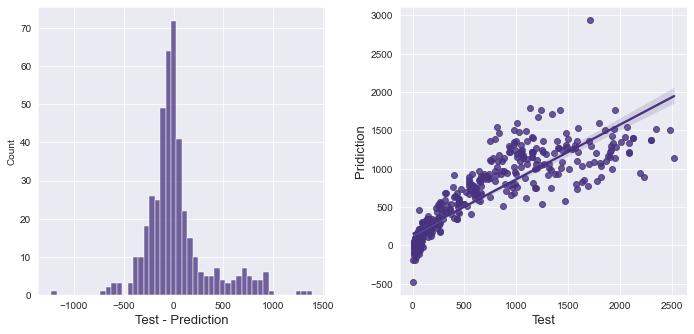

In [57]:
reg_model(X_train,X_test,y_train,y_test)

##### Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(n_estimators = 100,
                           max_features = 7,
                           random_state = 42)

In [60]:
def rf_model(X_train, X_test, y_train, y_test):
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print('[Random Forest Regression]','\n\n')
    
    print('train score :',rf.score(X_train, y_train))
    print('test score :',rf.score(X_test, y_test))
    print('-'*80)
    
    print('MAE', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-'*80)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(y_test - y_pred)
    plt.xlabel('Test - Prediction', fontsize = 13)
    
    plt.subplot(1,2,2)
    sns.regplot(x = y_test, y = y_pred)
    plt.xlabel('Test', fontsize = 13)
    plt.ylabel('Pridiction', fontsize = 13)
    
    plt.tight_layout(pad = 2)
    
    plt.show()

[Random Forest Regression] 


train score : 0.9833156414396852
test score : 0.9015897042103659
--------------------------------------------------------------------------------
MAE 105.68256756756756
MSE 40133.63804909911
RMSE 200.33381653904343
--------------------------------------------------------------------------------


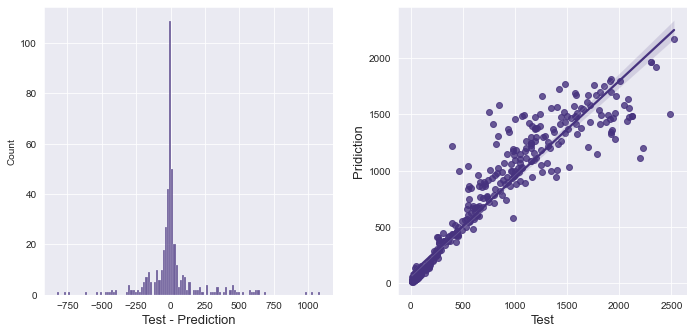

In [61]:
rf_model(X_train,X_test,y_train,y_test)

隨機森林迴歸的MAE、MSE及RMSE皆低於線性迴歸，故以隨機森林迴歸作為此數據的預估模型較為合適，誤差較低。